In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from seaborn import despine

from utils.plotting import cm2inch

# Data I/O

In [2]:
subjects = np.arange(49)
setsizes = np.array([9, 16, 25, 36])
colors = ['darkturquoise', 'orange', 'mediumseagreen', 'lightcoral']

# 1: *RAW* liking rating distribution per subject

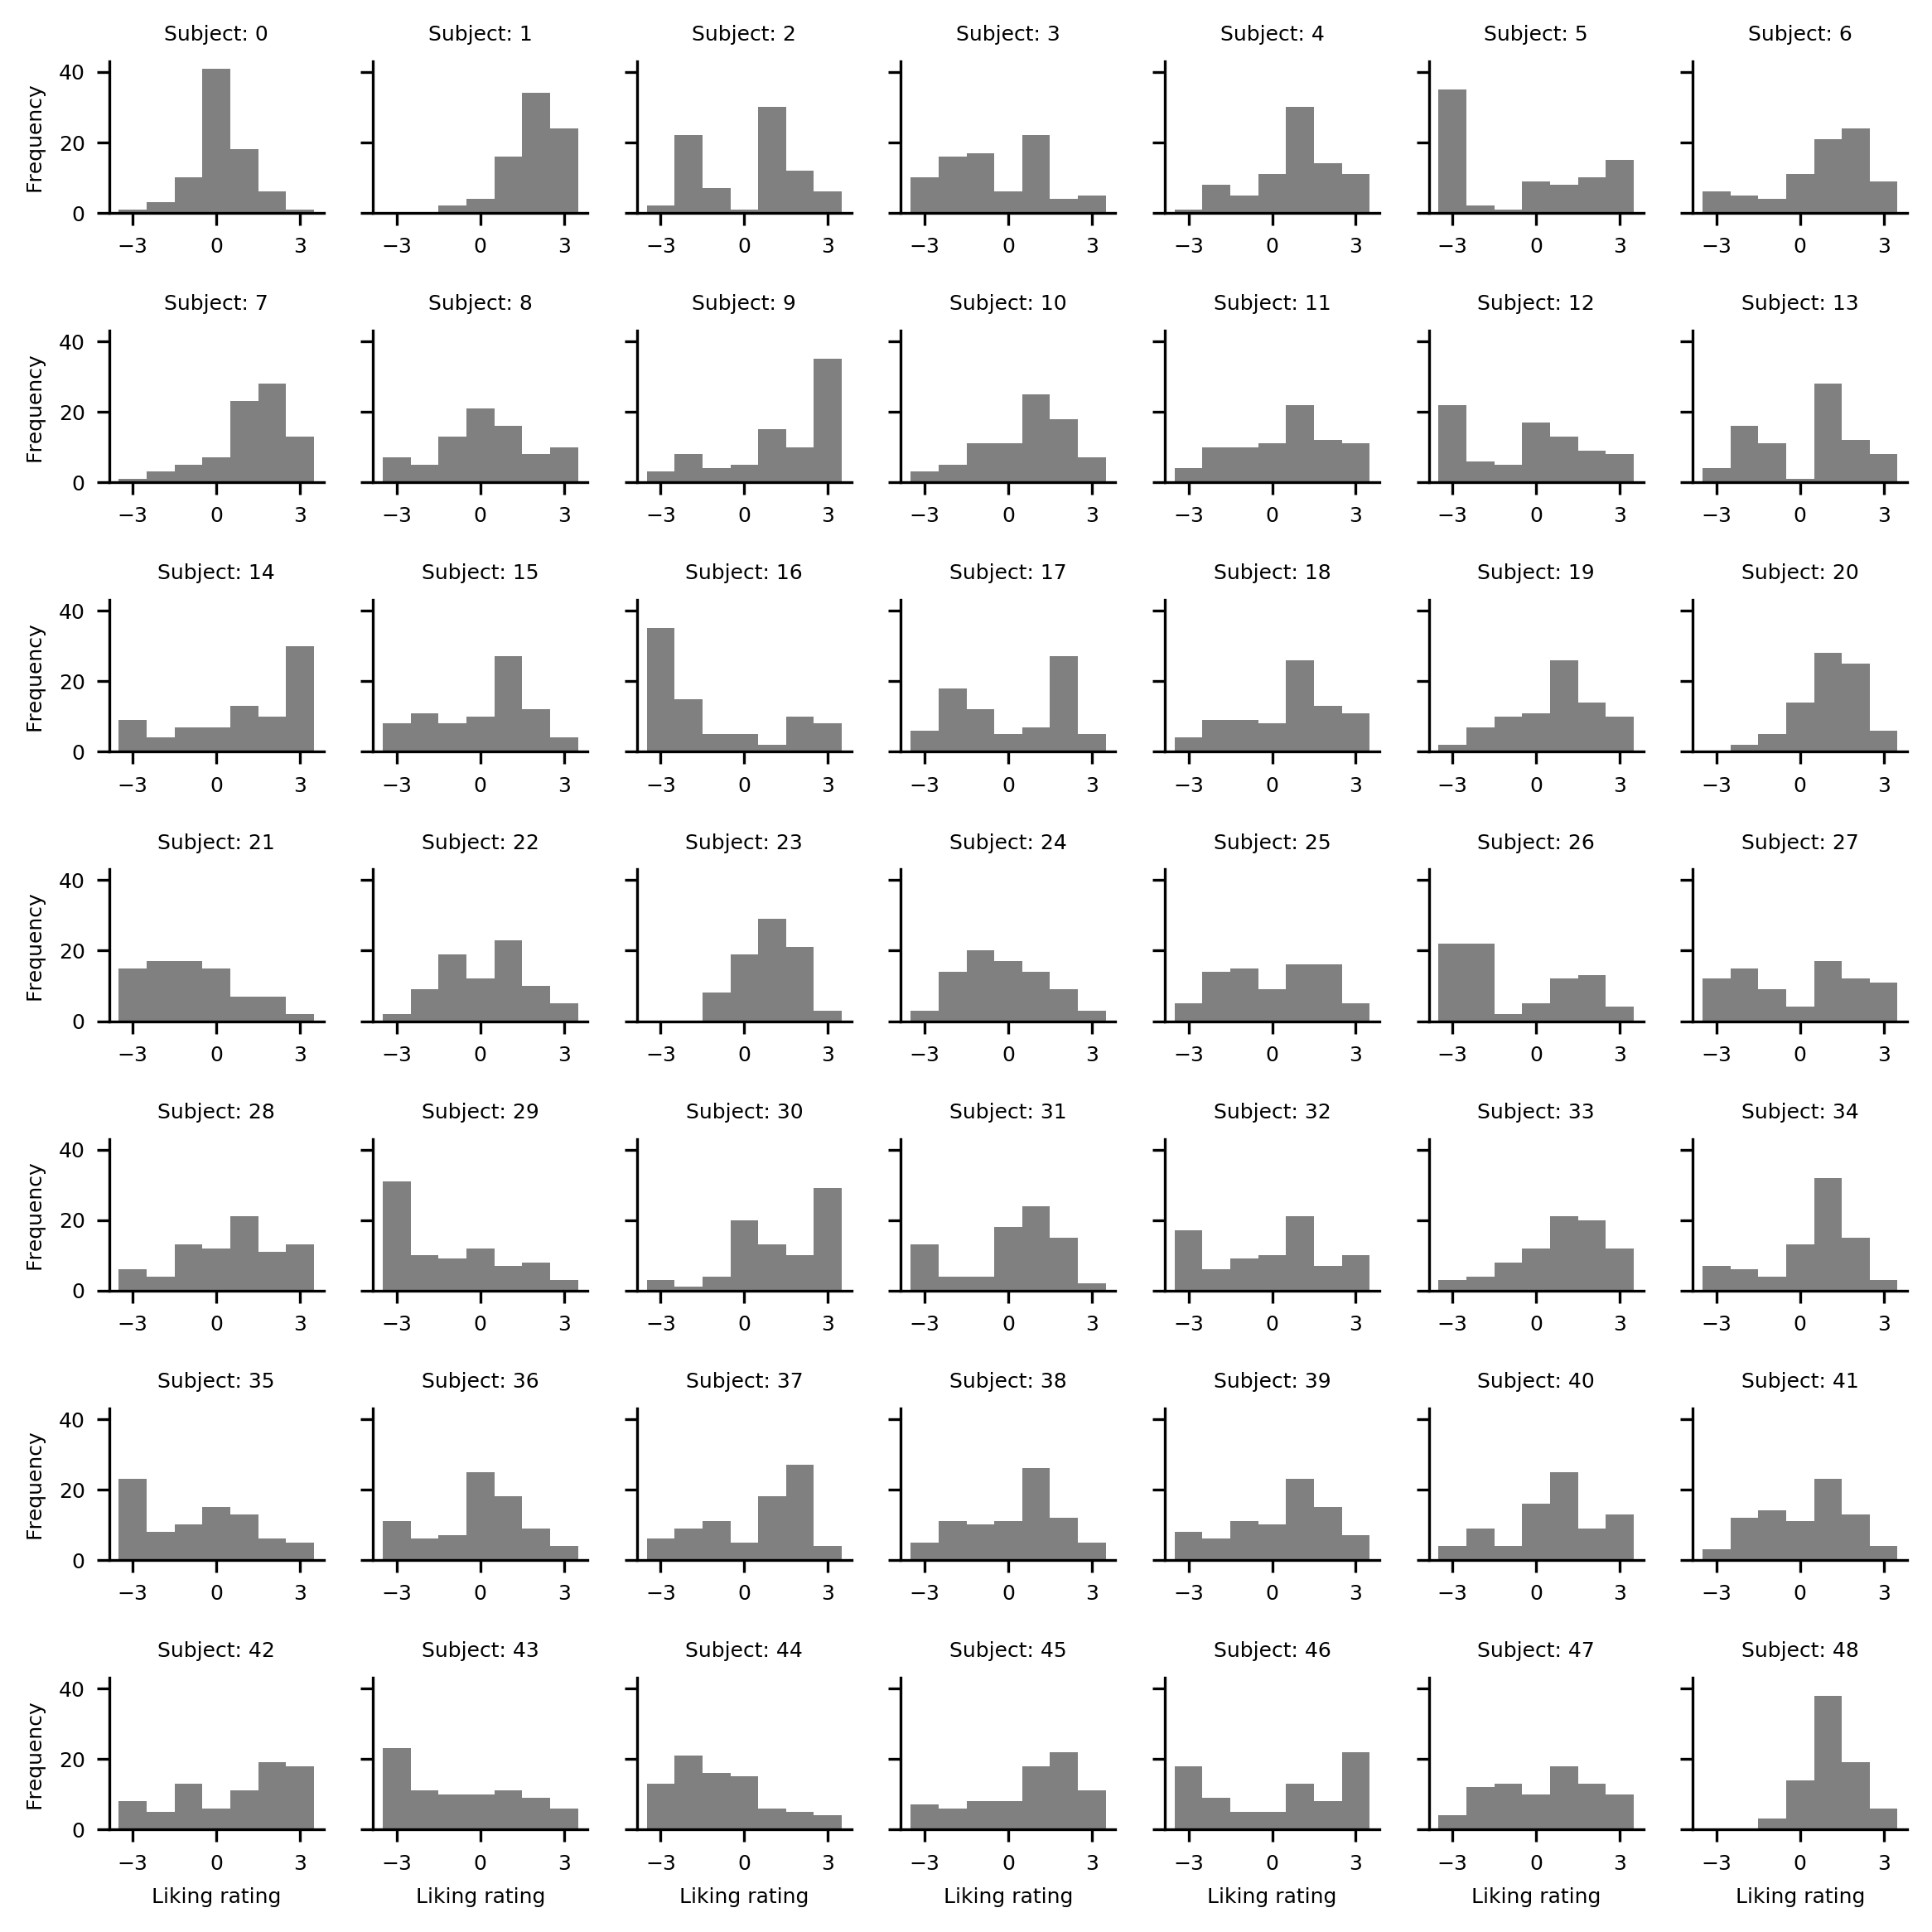

In [3]:
fig, axs = plt.subplots(7,7,figsize=cm2inch(20,20),dpi=300, sharey=True)

for ax in axs[:,0]:
    ax.set_ylabel('Frequency', fontsize=6)    
for ax in axs[-1,:]:
    ax.set_xlabel('Liking rating', fontsize=6)
axs = axs.ravel()

for ax, subject in zip(axs, subjects):
    liking_ratings = pd.read_csv('data/subject_files/{}_likingRatings.csv'.format(subject))
    ax.hist(liking_ratings['value'].values, bins=[-3, -2, -1, 0, 1, 2, 3, 4], color='gray', align='left')
    ax.set_title('Subject: {}'.format(subject), fontsize=6)
    ax.set_xticks([-3,0,3])
    ax.tick_params(axis='both', which='major', labelsize=6)
    despine(ax=ax)
    
fig.tight_layout()
fig.savefig('figures/Figure-1-figure-supplement-2_individual-liking-ratings.pdf', dpi=300)
fig.savefig('figures/Figure-1-figure-supplement-2_individual-liking-ratings.png', dpi=300)
fig.savefig('figures/Figure-1-figure-supplement-2_individual-liking-ratings.jpg', dpi=300)

# 2: Absolute and relative liking rating distributions

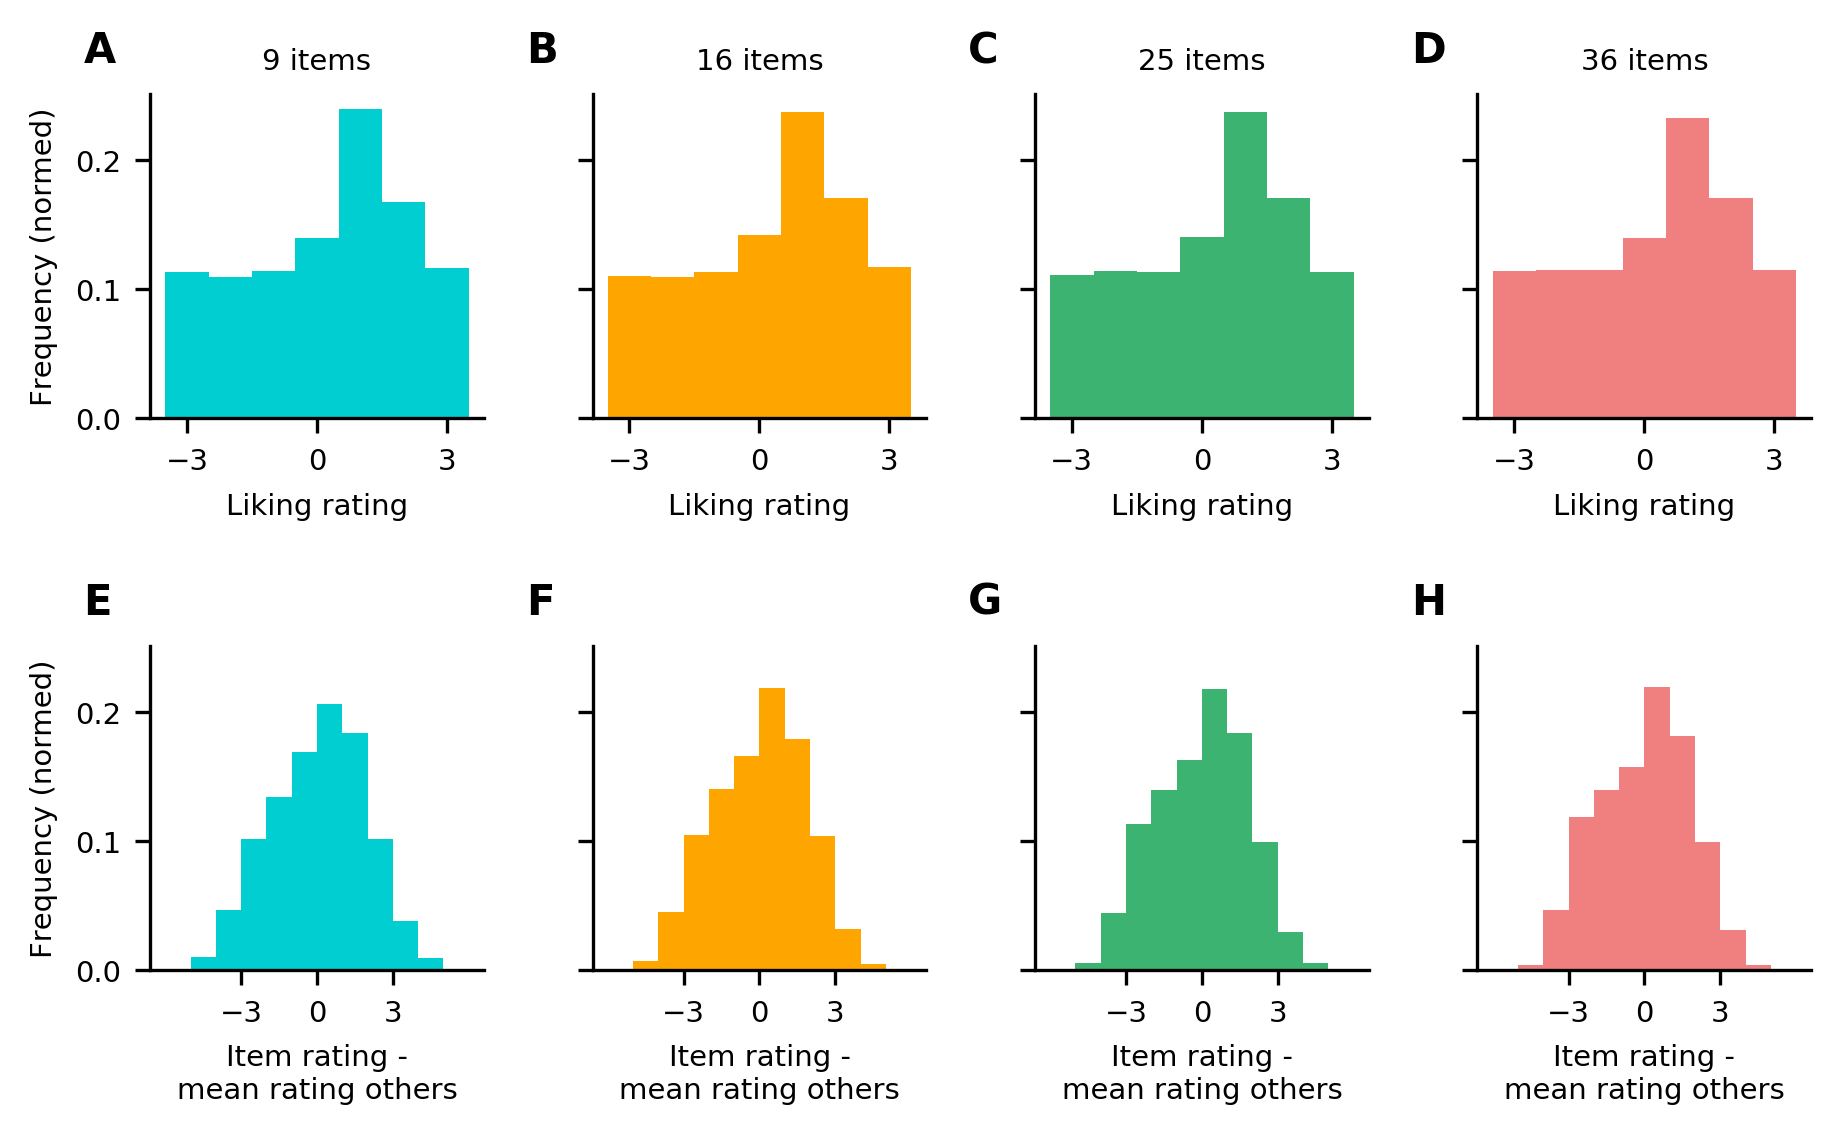

In [4]:
fig, axs = plt.subplots(2, 4, figsize=cm2inch(16,10), dpi=300, sharey=True)

for si, setsize in enumerate(setsizes):
    absolute_values = []
    relative_values = []
    data = pd.read_csv('data/summary_files/{}_data.csv'.format(setsize))
    for subject in subjects:
        subject_data = data[data['subject']==subject].copy()
        values = subject_data[['item_value_{}'.format(i) for i in range(setsize)]].values
        absolute_values.append(values)
        relative_values_sub = np.zeros_like(values)
        for i in range(setsize):
            others = np.arange(setsize)!=i
            relative_values_sub[:,i] = values[:,i] - np.mean(values[:,others], axis=1)
        relative_values.append(relative_values_sub)
    axs[0,si].hist(np.concatenate([a.ravel() for a in absolute_values]), 
                   bins=[-3, -2, -1, 0, 1, 2, 3, 4],  align='left', density=True, color=colors[si])
    axs[1,si].hist(np.concatenate([r.ravel() for r in relative_values]),
                   bins=np.arange(-6,7), density=True, color=colors[si])
    axs[0,si].set_title('{} items'.format(setsize), fontsize=7)
    axs[1,si].set_xlabel('Item rating -\nmean rating others', fontsize=7)
    axs[0,si].set_xlabel('Liking rating', fontsize=7)
    if si == 0:
        axs[0,si].set_ylabel('Frequency (normed)', fontsize=7)
        axs[1,si].set_ylabel('Frequency (normed)', fontsize=7)

for ax, label in zip(axs.ravel(), list('ABCDEFGH')):
    despine(ax=ax)
    ax.set_xticks([-3, 0, 3])
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.text(-0.2, 1.2, label, transform=ax.transAxes,
            fontsize=10, fontweight='bold', va='top')
    
fig.tight_layout()
fig.savefig('figures/Figure-1-figure-supplement-3_setsize-liking-ratings.pdf', dpi=300)
fig.savefig('figures/Figure-1-figure-supplement-3_setsize-liking-ratings.png', dpi=300)
fig.savefig('figures/Figure-1-figure-supplement-3_setsize-liking-ratings.jpg', dpi=300)